# Face It.. We'hv got feelings EDA

In [1]:
#!pip install tensorflow

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disable GPU
import tensorflow as tf

2025-09-01 18:02:56.221942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 18:02:56.255808: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-01 18:02:57.388168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-01 18:03:02.444951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras import Sequential, Input, layers


In [4]:
data_dir = "/home/deepa/code/hannahkiesow/face_it/raw_data/Face_it_Data"

In [5]:
emotions = os.listdir(data_dir)
print("Emotion categories:", emotions)

Emotion categories: ['happiness', 'sadness', 'neutrality', 'surprise', 'fear', 'anger', 'disgust', 'contempt']


In [6]:
extensions = set()

for root, dirs, files in os.walk(data_dir):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        extensions.add(ext)

print("Available extensions:", extensions)

Available extensions: {'.identifier', '.png'}


In [7]:
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
counts = []
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        counts.append(len(images))
        print(f"{folder}: {len(images)} images")

happiness: 1406 images
sadness: 746 images
neutrality: 524 images
surprise: 775 images
fear: 570 images
anger: 890 images
disgust: 439 images
contempt: 208 images


In [ ]:
def show_images(emotion, n=5):
    folder = os.path.join(data_dir, emotion)
    files = [f for f in os.listdir(folder) if f.endswith('.png')][:n]
    plt.Figure(figsize=(10,10))
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)

        plt.subplot(5,5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(emotion)
        plt.axis("off")
    plt.show()

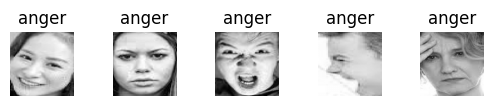

In [9]:
show_images("anger")

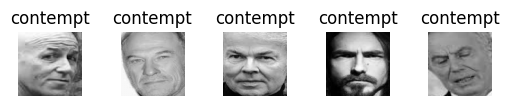

In [10]:
show_images("contempt")

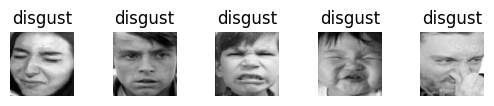

In [12]:
show_images("disgust")

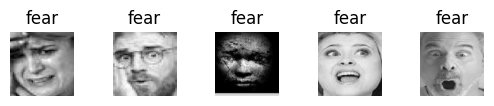

In [13]:
show_images("fear")

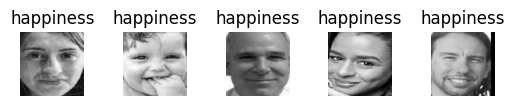

In [14]:
show_images("happiness")

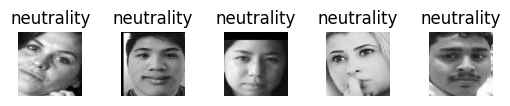

In [15]:
show_images("neutrality")

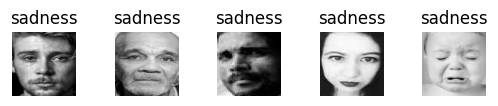

In [16]:
show_images("sadness")

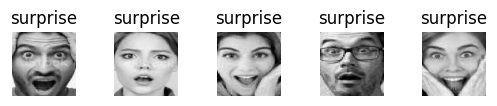

In [17]:
show_images("surprise")

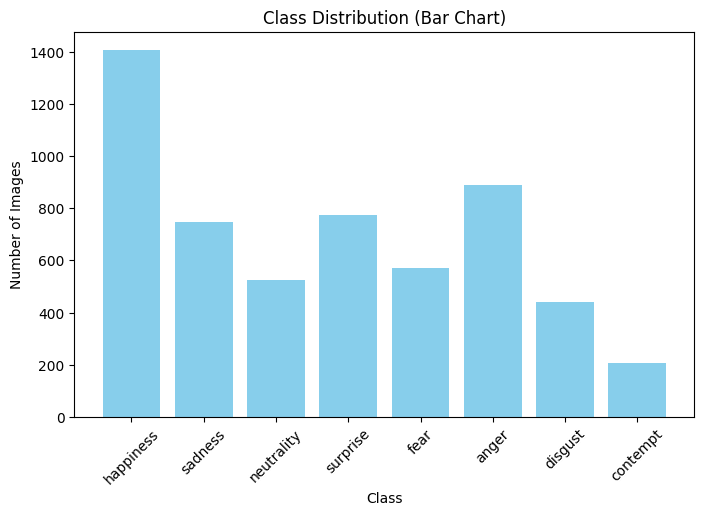

In [18]:
plt.figure(figsize=(8,5))
plt.bar(folders, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Class Distribution (Bar Chart)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [19]:
len(folders)

8

In [20]:
data_info = {f: (len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]), mpimg.imread(os.path.join(data_dir,f,[i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')][0])).shape) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(data_info)

{'happiness': (1406, (224, 224)), 'sadness': (746, (224, 224)), 'neutrality': (524, (224, 224)), 'surprise': (775, (224, 224)), 'fear': (570, (224, 224)), 'anger': (890, (224, 224)), 'disgust': (439, (224, 224)), 'contempt': (208, (224, 224))}


### List of unique shapes across all images

In [21]:
unique_shapes = set(mpimg.imread(os.path.join(data_dir,f,i)).shape for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f)) for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))
print(unique_shapes)

{(224, 224)}


In [22]:
total_images = sum(len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f)))
print(total_images)

5558


In [ ]:
avg_shape = {f: (sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[0] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]),
                 sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[1] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]))
             for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(avg_shape)

{'happiness': (224, 224), 'sadness': (224, 224), 'neutrality': (224, 224), 'surprise': (224, 224), 'fear': (224, 224), 'anger': (224, 224), 'disgust': (224, 224), 'contempt': (224, 224)}


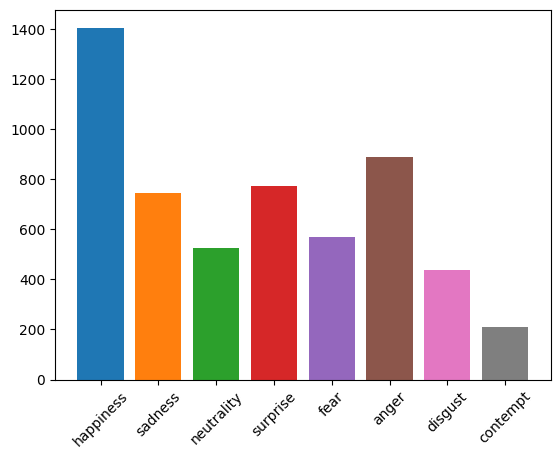

In [24]:
import matplotlib.pyplot as plt
[plt.bar(f, len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')])) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))]; plt.xticks(rotation=45); plt.show()

In [25]:
sample_image_path = os.path.join(data_dir, "anger", "2Q___face.png")
img = mpimg.imread(sample_image_path)

print(img.shape)

(224, 224)


In [ ]:
X, y = [], []

classes = sorted(os.listdir(data_dir))
class_map = {cls:i for i, cls in enumerate(classes)}

for cls in classes:
    folder = os.path.join(data_dir, cls)
    for file in os.listdir(folder):
        if file.endswith('.png'):
            img = mpimg.imread(os.path.join(folder, file))
            if img.ndim == 2:
                img = img[:, :, np.newaxis]
            X.append(img)
            y.append(class_map[cls])

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(5558, 224, 224, 1) (5558,)


In [31]:
X = X / 255.0

In [32]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=len(classes))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4446, 224, 224, 1) (4446, 8)
(1112, 224, 224, 1) (1112, 8)


In [ ]:
def initialize_base_emotion_model():

    model = Sequential()
    model.add(Input(shape=(224,224,1)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation="relu",padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(8, activation="softmax"))

    ### Model compilation
    model.compile(loss="categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

model = initialize_base_emotion_model()

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,864,456 (49.07 MB)

 Trainable params: 12,864,456 (49.07 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from keras.callbacks import EarlyStopping

model = initialize_base_emotion_model()

es = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights=True)

In [45]:
history = model.fit(
    X_train,
    y_train,
    #validation_data=(X_test, y_test),
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 504ms/step - accuracy: 0.2357 - loss: 2.0038 - val_accuracy: 0.2652 - val_loss: 1.9649
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 57s 506ms/step - accuracy: 0.2483 - loss: 1.9847 - val_accuracy: 0.2652 - val_loss: 1.9926
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 57s 512ms/step - accuracy: 0.2517 - loss: 1.9805 - val_accuracy: 0.2652 - val_loss: 1.9552
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 521ms/step - accuracy: 0.2508 - loss: 1.9825 - val_accuracy: 0.2652 - val_loss: 1.9665
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 60s 540ms/step - accuracy: 0.2522 - loss: 1.9818 - val_accuracy: 0.2652 - val_loss: 1.9880
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 70s 621ms/step - accuracy: 0.2522 - loss: 1.9813 - val_accuracy: 0.2652 - val_loss: 1.9628
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 64s 572ms/step - accuracy: 0.2522 - loss: 1.9747 - val_accuracy: 0.2652 - val_loss: 1.9539
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 63s 562ms/step - accuracy: 0.2520 - loss: 1

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2455 - loss: 1.9678


In [47]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0
